# SIR for mosquito vectors
This is the Python version of program 4.4 from page 136 of "Modeling Infectious Disease in humans and animals" by Keeling & Rohani.
This is based on code written by Ilias Soumpasis.

In [1]:
import scipy.integrate as spi
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Parameters (rates here are specified in terms of days)

r=0.5/1e3 #rate at which humans are bitten
beta=np.array([[0, 0.5], [0.8, 0]]); #transmission matrix
gamma=np.array([0.033, 0]);          #recovery rates
mu=np.array([5.5e-5, 0.143]);        #natural death rates
nu=np.array([5.5e-2, 1.443e3]);      #birth rates 

#initial conditions
X0=np.array([1e3, 1e4]);
Y0=np.array([1, 1]);

ND=MaxTime=1000.0; #number of days
TS=1.0 #time step

INPUT=np.hstack((X0,Y0))

In [3]:
def diff_eqs(INP,t):  
	'''The main set of equations'''
	Y=np.zeros((4))
	V = INP   
	Y[0] = nu[0] - V[0] * r * (beta[0][1]*V[3]) - mu[0] * V[0]
	Y[1] = nu[1] - V[1] * r * (beta[1][0]*V[2]) - mu[1] * V[1]
	Y[2] = V[0] * r * (beta[0][1]*V[3]) - gamma[0] * V[2] - mu[0] * V[2]
	Y[3] = V[1] * r * (beta[1][0]*V[2]) - mu[1] * V[3]
	return Y   # For odeint

In [4]:
t_start = 0.0; t_end = ND; t_inc = TS
t_range = np.arange(t_start, t_end+t_inc, t_inc)
RES = spi.odeint(diff_eqs,INPUT,t_range)

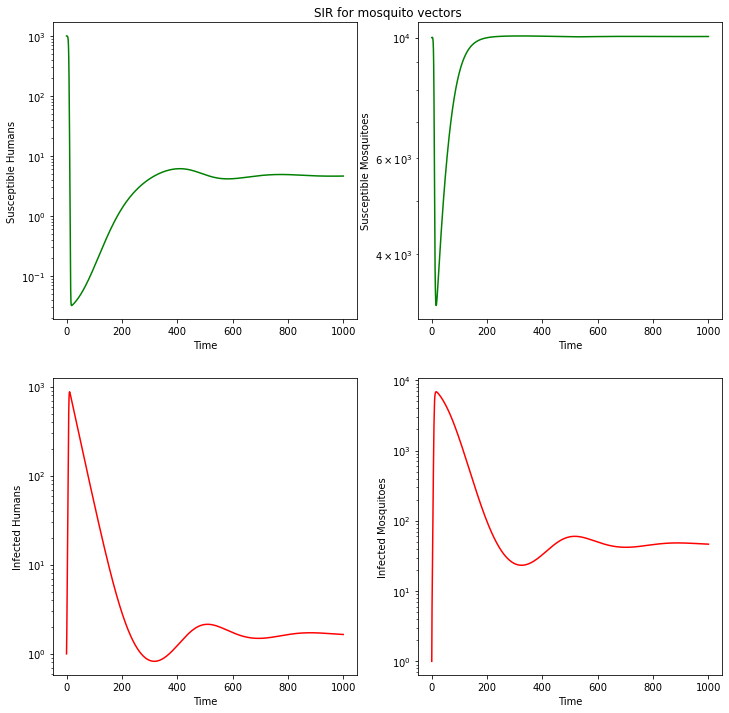

In [6]:
#Ploting
fig=plt.figure(figsize=(12,12))
plt.axis('off')
plt.title('SIR for mosquito vectors')


fig.add_subplot(221)
plt.semilogy(RES[:,0], 'g', label='SH')
plt.xlabel('Time')
plt.ylabel('Susceptible Humans')
fig.add_subplot(222)
plt.semilogy(RES[:,1], 'g', label='SM')
plt.xlabel('Time')
plt.ylabel('Susceptible Mosquitoes')
fig.add_subplot(223)
plt.semilogy(RES[:,2], 'r', label='IH')
plt.xlabel('Time')
plt.ylabel('Infected Humans')
fig.add_subplot(224)
plt.semilogy(RES[:,3], 'r', label='IM')
plt.xlabel('Time')
plt.ylabel('Infected Mosquitoes')
plt.show()
fig.savefig('SIR_mosquitos.pdf')